# Plant Growth Dataset

### About the Notebook

This notebook provides an analysis of the PlantGrowth dataset. 
It includes explanations for the t-test and ANOVA, statistical tests to compare group means, and visualizations to explore the data distribution.

### Dataset Description

`PlantGrowth` data set is the result from an experiment where dried weight of plants was measured to compare yields.

It contains 30 cases on:

`weight`- The weight of the plants.

`group`-The treatment group (ctrl, trt1 and trt2)

https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html


### Library

In [28]:
# Import necessary libraries

import pandas as pd # For data visualisation
import numpy as np # For numerical operations on arrays
import scipy.stats as stats # For staistical functions
from scipy.stats import f_oneway # statistical functions
import matplotlib.pyplot as plt # for data visualisation
import seaborn as sns # for plotting

### Load Data

In [29]:
url ="https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv"
df = pd.read_csv(url)

In [30]:
# Display the first few rows of the dataset
df.head()


,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [31]:
# Describe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [32]:
# Summary of statistics
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


### T-test

A t-test is a statistical test used to compare the means of two groups. It determines whether there is a significant difference between the groups. 

**T-Test Assumptions**

**Independence:** The observations in one sample are independent of the observations in the other sample.

**Normality:** When plotted both samples are approximately normally distributed.

**Homogeneity of Variances:** Both samples have approximately the same variance.

**Continuous Data:** T-tests require continuous data.

**Outliers:** There should be no significant outliers.

**Random Sampling:** The sample data have been randomly sampled from a population.



https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php

https://blog.minitab.com/en/adventures-in-statistics-2/understanding-t-tests-t-values-and-t-distributions


### Independent t_test between trt1 and trt2.

**Null hypothesis:** the 2 groups have identical average values.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind

In [33]:
# Filter for the two treatment groups: trt1 and trt2
trt1 = df[df["group"] == "trt1"]["weight"]
trt2 = df[df["group"] == "trt2"]["weight"]

In [34]:
# Perform t test
stats.ttest_ind(trt1, trt2)


TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)

The p-value (0.0075) is below the threshold (p=0.05), therefore there's no evidence to accept the null hypothesis.

#### ANOVA

**Analysis of variance (ANOVA)** is a statistical test used to evaluate the difference between the means of more than two groups (whether differences are meaningful or due to random chance).

https://www.investopedia.com/terms/a/anova.asp

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php



### Anova test for ctrl, trt1 and trt2.

One way Anova tests the null hypothesis that ctrl, trt1 and trt2 have the same mean.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#f-oneway


In [35]:
# Filter for the three treatment groups: trt1 and trt2
trt1 = df[df["group"] == "trt1"]["weight"]
trt2 = df[df["group"] == "trt2"]["weight"]
ctrl = df[df["group"] == "ctrl"]["weight"]

In [36]:
# Perform ANOVA

f_statistic, p_value = f_oneway(ctrl, trt1, trt2)

#Show.
f_statistic, p_value

(4.846087862380136, 0.0159099583256229)

### Tukey's HSD

`scipy.stats.tukey_hsd`: performs Tukey’s HSD test for equality of means over multiple treatments.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html#tukey-hsd

In [37]:
# Tukey's HSD.
result = stats.tukey_hsd(ctrl, trt1, trt2)

# Show
print(result)


Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.371     0.391    -0.320     1.062
 (0 - 2)     -0.494     0.198    -1.185     0.197
 (1 - 0)     -0.371     0.391    -1.062     0.320
 (1 - 2)     -0.865     0.012    -1.556    -0.174
 (2 - 0)      0.494     0.198    -0.197     1.185
 (2 - 1)      0.865     0.012     0.174     1.556



p-value = 0.05

`trt1 and trt2`: p-value = 0.012 which is below 0.05 ,there is a significance difference between their means

`ctrl and trt1`: p-value = 0.391,
`ctrl and trt2`: p-value = 0.198, there is no difference in means for the above combinations.

## Anova vs multiple t-tests

When analyzing more than two groups, performing multiple t-tests increases the risk of a Type I error (false positive). 
ANOVA controls for this by testing all group means simultaneously, reducing the overall error rate.

## Plots


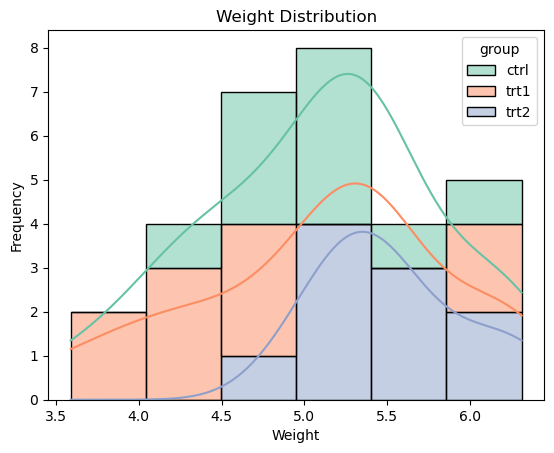

In [38]:
# Histogram of weights for each group
sns.histplot(data=df, x="weight", hue="group", kde=True, multiple="stack", palette="Set2")
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.savefig('img/weight_distribution')

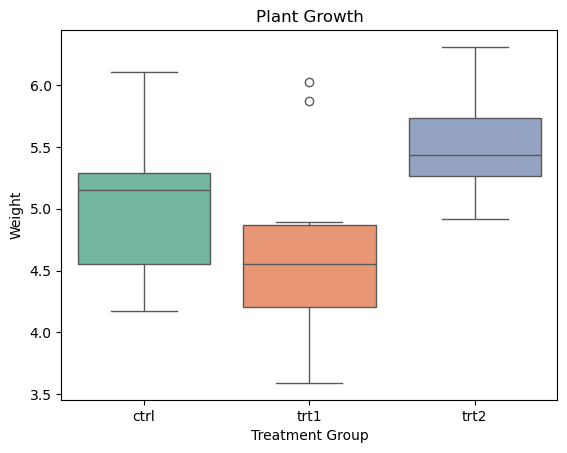

In [39]:
# Boxplot to visualize group differences

sns.boxplot(x="group", y="weight", data=df, hue="group",palette="Set2")
plt.title("Plant Growth")
plt.xlabel("Treatment Group")
plt.ylabel("Weight")
plt.savefig('img/weight_pergroup')

# End